# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J*

**Names:**

* *Gankin, Dennis*
* *Zhang, Yuan*
* *Ji, Yipeng*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget that nobody reads this but hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

Code from helper

In [1]:
import epidemics_helper
from networkx.readwrite import json_graph
import networkx as nx
import json
import matplotlib.pyplot as plt

In [2]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

G = read_json_file("data/nyc_augmented_network.json")

In [3]:
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=.1)

In [4]:
sir.launch_epidemic(source=23654, max_time=100.0)

Epidemic stopped after 103.76 days | 103.76 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


Functions for plotting 

In [5]:
def plt_epidemic(G,sir,days,stop=50):
    #variables for storing
    inf_time=[0]*days
    rec_time=[0]*days
    inf_time_sum=[0]*days
    rec_time_sum=[0]*days
    susc_time=[len(G.nodes())]*days
    
    for i in range(len(G.nodes())):
        if sir.inf_time[i] != float('inf'):
            inf_time[int(sir.inf_time[i])]=inf_time[int(sir.inf_time[i])]+1
        if sir.rec_time[i] != float('inf') :
            rec_time[int(sir.rec_time[i])]=rec_time[int(sir.rec_time[i])]+1

    for i in range(days):
        if i!=0:
            rec_time_sum[i]=rec_time[i]+rec_time_sum[i-1]
            inf_time_sum[i]=inf_time[i]+inf_time_sum[i-1]-rec_time[i]
            susc_time[i]=susc_time[i-1]-inf_time[i]
        else:
            rec_time_sum[i]=rec_time[i]
            inf_time_sum[i]=inf_time[i]
            susc_time[i]=susc_time[i]-inf_time[i]
        
    num_nodes=len(G.nodes())
        
    for i in range(days):
        susc_time[i]=susc_time[i]*100/num_nodes
        rec_time_sum[i]=rec_time_sum[i]*100/num_nodes
        inf_time_sum[i]=inf_time_sum[i]*100/num_nodes
    
    #plotting
    print ("Infection and recovery per day")
    plt.plot(rec_time)
    plt.plot(inf_time)
    plt.legend(["Recovery","Infection"])
    #plt.plot(susc_time, label="Suceptible")
    plt.gca().set_xlim([-1,stop])
    plt.xlabel("Day")
    plt.ylabel("Amound of nodes")
    plt.show()

    print ("Percentage of infected and recovered people over time")
    plt.plot(rec_time_sum)
    plt.plot(inf_time_sum)
    plt.plot(susc_time)
    plt.legend(["Recovery","Infection","Susceptible"])
    #plt.plot(susc_time, label="Suceptible")
    plt.gca().set_xlim([-1,stop])
    plt.xlabel("Days passed")
    plt.ylabel("Percentage of nodes (%)")
    plt.show()

#### Plot of epidemic over time 

Infection and recovery per day


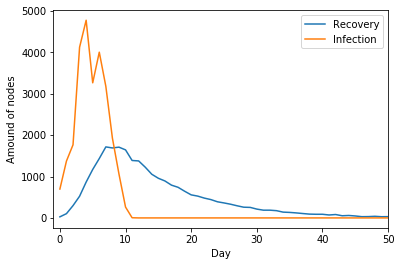

Percentage of infected and recovered people over time


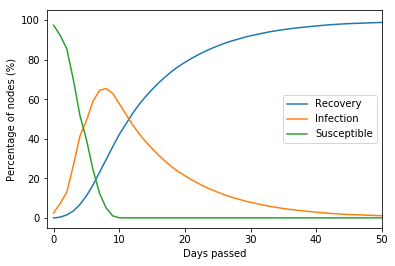

In [6]:
plt_epidemic(G,sir,100)

The plot shows that it takes around seven days until over sixty percent of nodes are infected. The percentage of recovered or dead people converges to 100% quite quickly

#### Visualized epidemic graph

In [7]:
import math

def visualize_in_graph(G,days,sir,short=2000):
    num_nodes=len(G.nodes())
    #create color array for the nodes
    node_color=["b"]*num_nodes 
    #get coordinates to place in right position
    coord=nx.get_node_attributes(G,'coordinates')
    
    #get node status returns 
    # 0 -- susceptible
    # 1 -- infected
    # 2 -- recovered
    
    for i in range(num_nodes):
        status=sir.get_node_status(i,days)
        if status != 0: # blue for susceptible
            if status==1:
                node_color[i]="r"  #red for infected
            else:
                node_color[i]="g"  #green for recovered
    nx.draw_networkx(G, node_color=node_color,pos=coord,with_labels=False,node_size=0.2)    
    plt.show()

New York after one day.

blue nodes - susceptible  
red - infected  
green - recovered/dead   

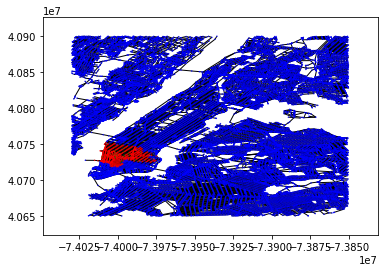

In [8]:
visualize_in_graph(G,1,sir)

New York after three days

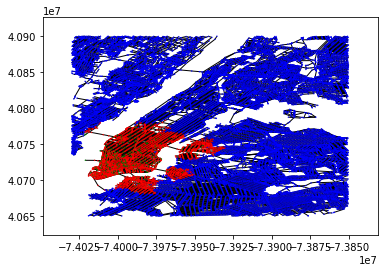

In [9]:
visualize_in_graph(G,3,sir)

New York after 30 days

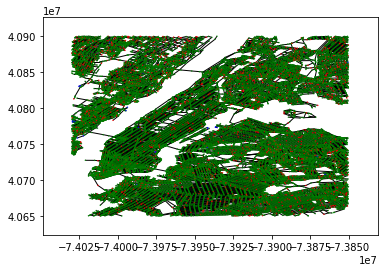

In [10]:
visualize_in_graph(G,30,sir)

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [11]:
import random
G = read_json_file("data/nyc_augmented_network.json")


def remove_edges(G,num):
    G1=G.copy()
        #remove edges 
    for i in range(num):
        edges=list(G1.edges())
        chosen_edge = random.choice(edges)
        G1.remove_edge(chosen_edge[0], chosen_edge[1])
    return G1

In [12]:
def epidemics_with_roadblocks(Graph,days):
    sir=[]
        
    for n in range(10):
        #pick random starting point
        start_node=random.choice(range(len(Graph.nodes())))
        sir.append(epidemics_helper.SimulationSIR(Graph, beta=10.0, gamma=.1))
        sir[n].launch_epidemic(source=start_node, max_time=days)
    return sir 

#### Removing 1000 edges

Epidemic stopped after 50.00 days | 50.00 days elapsed | 0.6% susceptible, 1.4% infected, 98.0% recovered
Infection and recovery per day


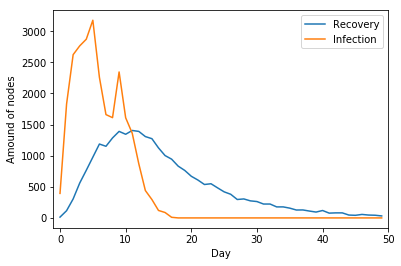

Percentage of infected and recovered people over time


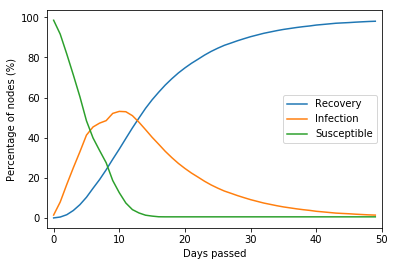

In [15]:
G1=remove_edges(G,1000)
random_id=random.choice(range(len(G1.nodes())))
sir=epidemics_helper.SimulationSIR(G1, beta=10.0, gamma=.1)
sir.launch_epidemic(source=random_id, max_time=50)
plt_epidemic(G1,sir,50)

In [16]:
sir_1000=epidemics_with_roadblocks(G1,30)

Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.6% susceptible, 8.3% infected, 91.1% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.6% susceptible, 10.7% infected, 88.7% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.5% susceptible, 11.0% infected, 88.5% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.6% susceptible, 8.9% infected, 90.5% recovered
Epidemic stopped after 30.01 days | 30.01 days elapsed | 0.6% susceptible, 9.3% infected, 90.1% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.5% susceptible, 9.8% infected, 89.7% recovered
Epidemic stopped after 30.01 days | 30.01 days elapsed | 20.3% susceptible, 6.6% infected, 73.1% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.6% susceptible, 9.2% infected, 90.2% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.7% susceptible, 11.9% infected, 87.4% recovered
Epidemic stopped after 30.00 days | 30.00 

Removing ***1000 edges*** had only little impact on the amount of infected people. On average after thirty days there are 88% of recovered/dead people, only around 0.5% are still susceptible (except one outlier) and the rest is infected. Thus 1000 random roadblocks are not able to stop an epidemic.

#### Removing 10000 edges

Epidemic stopped after 50.02 days | 50.02 days elapsed | 24.6% susceptible, 1.2% infected, 74.2% recovered
Infection and recovery per day


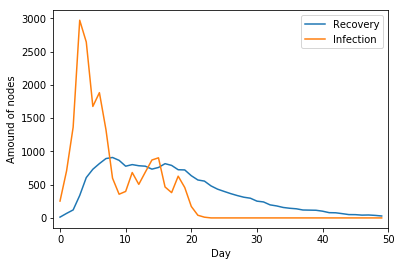

Percentage of infected and recovered people over time


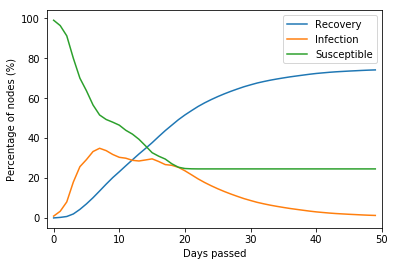

In [17]:
G1=remove_edges(G,10000)
random_id=random.choice(range(len(G1.nodes())))
sir=epidemics_helper.SimulationSIR(G1, beta=10.0, gamma=.1)
sir.launch_epidemic(source=random_id, max_time=50)
plt_epidemic(G1,sir,50)

In [18]:
sir_10000=epidemics_with_roadblocks(G1,30)

Epidemic stopped after 30.00 days | 30.00 days elapsed | 84.3% susceptible, 2.5% infected, 13.1% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 24.9% susceptible, 24.7% infected, 50.4% recovered
Epidemic stopped after 30.05 days | 30.05 days elapsed | 84.3% susceptible, 1.6% infected, 14.1% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 24.6% susceptible, 10.4% infected, 65.0% recovered
Epidemic stopped after 30.84 days | 30.84 days elapsed | 98.6% susceptible, 0.1% infected, 1.3% recovered
Epidemic stopped after 30.07 days | 30.07 days elapsed | 84.4% susceptible, 1.4% infected, 14.2% recovered
Epidemic stopped after 30.04 days | 30.04 days elapsed | 85.1% susceptible, 1.2% infected, 13.7% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 24.6% susceptible, 13.6% infected, 61.8% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 24.7% susceptible, 19.7% infected, 55.6% recovered
Epidemic stopped after 30.00 days 

Removing ***10000 edges*** helps a little and has a high variance in the results. The epidemic does not reach everyone. After 30 days on average 55% stay susceptible while 35% are recovered/dead and around 10% are still infected. The scores vary a lot though and depending on where the starting point is the epidemic might lead up to 54% of recovered/dead people.

#### Exercise 2.11: Strategy 2

We will rank the edges in order to delete the most important/most central ones first.
We use the edge centrality score for this purpose.

In [36]:
#We will rank the edges in order to delete the most important/most central ones first
#centrality
import networkx as nx
G = read_json_file("data/nyc_augmented_network.json")

#ranking edges
ranked_edges=nx.edge_betweenness_centrality(G,k=500)
ranking=sorted(ranked_edges.items(), key=lambda x: x[1])

G1=G.copy()
#remove top 2500 edges
for i in range(2500):
    G1.remove_edge(ranking[-i][0][0],ranking[-i][0][1])

In [40]:
import random
num_nodes=len(G1.nodes())


random_id=random.choice(range(num_nodes))
sir = epidemics_helper.SimulationSIR(G1, beta=10.0, gamma=.1)
sir.launch_epidemic(source=random_id, max_time=100.0)

Epidemic stopped after 109.77 days | 109.77 days elapsed | 66.3% susceptible, 0.0% infected, 33.6% recovered


Infection and recovery per day


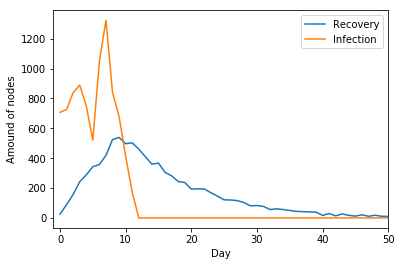

Percentage of infected and recovered people over time


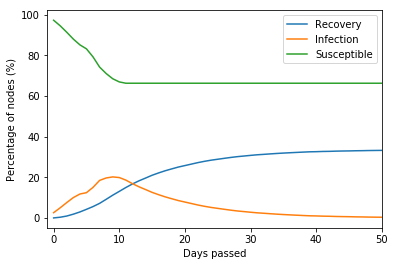

In [41]:
plt_epidemic(G1,sir,100,50)

In [55]:
sir_rank=epidemics_with_roadblocks(G1,30)

Epidemic stopped after 30.00 days | 30.00 days elapsed | 56.3% susceptible, 3.7% infected, 40.0% recovered
Epidemic stopped after 30.00 days | 30.00 days elapsed | 66.3% susceptible, 3.2% infected, 30.5% recovered
Epidemic stopped after 30.02 days | 30.02 days elapsed | 56.3% susceptible, 4.5% infected, 39.2% recovered
Epidemic stopped after 30.03 days | 30.03 days elapsed | 66.4% susceptible, 2.7% infected, 30.9% recovered
Epidemic stopped after 30.01 days | 30.01 days elapsed | 81.1% susceptible, 1.4% infected, 17.5% recovered
Epidemic stopped after 30.01 days | 30.01 days elapsed | 81.1% susceptible, 1.8% infected, 17.1% recovered
Epidemic stopped after 30.03 days | 30.03 days elapsed | 66.3% susceptible, 3.4% infected, 30.2% recovered
Epidemic stopped after 30.02 days | 30.02 days elapsed | 81.2% susceptible, 1.6% infected, 17.2% recovered
Epidemic stopped after 6.91 days | 6.91 days elapsed | 100.0% susceptible, 0.0% infected, 0.0% recovered
Epidemic stopped after 30.01 days | 30.

Ranking the edges proves to be quite effective. We are able to keep around 74% suscpetible people on average after 30 days but the results have high variance, porbably dependant on the random start node.